## Download HoneyPot_dataSet

In [ ]:
!wget http://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip

--2022-02-15 08:23:38--  http://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip
Resolving infolab.tamu.edu (infolab.tamu.edu)... 45.55.217.29
Connecting to infolab.tamu.edu (infolab.tamu.edu)|45.55.217.29|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip [following]
--2022-02-15 08:23:39--  https://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip
Connecting to infolab.tamu.edu (infolab.tamu.edu)|45.55.217.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263659672 (251M) [application/zip]
Saving to: ‘social_honeypot_icwsm_2011.zip’

social_honeypot_icw 100%[===================>] 251.45M  15.0MB/s    in 21s     

2022-02-15 08:24:02 (11.8 MB/s) - ‘social_honeypot_icwsm_2011.zip’ saved [263659672/263659672]



In [ ]:
!unzip social_honeypot_icwsm_2011.zip

Archive:  social_honeypot_icwsm_2011.zip
   creating: social_honeypot_icwsm_2011/
  inflating: social_honeypot_icwsm_2011/content_polluters.txt  
   creating: __MACOSX/
   creating: __MACOSX/social_honeypot_icwsm_2011/
  inflating: __MACOSX/social_honeypot_icwsm_2011/._content_polluters.txt  
  inflating: social_honeypot_icwsm_2011/content_polluters_followings.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._content_polluters_followings.txt  
  inflating: social_honeypot_icwsm_2011/content_polluters_tweets.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._content_polluters_tweets.txt  
  inflating: social_honeypot_icwsm_2011/legitimate_users.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._legitimate_users.txt  
  inflating: social_honeypot_icwsm_2011/legitimate_users_followings.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._legitimate_users_followings.txt  
  inflating: social_honeypot_icwsm_2011/legitimate_users_tweets.txt  
  inflating: __MACOSX/soci

In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import re, string

from scipy.stats import zscore
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import scikitplot as skplt
import matplotlib.pyplot as plt

## Read Data

In [ ]:

def func(string):
   return pd.Series(string.split(',')).astype(int)
  
  
dfContent_polluters = pd.read_csv('social_honeypot_icwsm_2011/content_polluters.txt',sep='\t', names=
                 ["UserID","CreatedAt","CollectedAt","NumberOfFollowings","NumberOfFollowers",
                  "NumberOfTweets","LengthOfScreenName","LengthOfDescriptionInUserProfile"],
                parse_dates=["CreatedAt","CollectedAt"])

dfContent_polluters_followings = pd.read_csv('social_honeypot_icwsm_2011/content_polluters_followings.txt',sep='\t', names=
                 ["UserID","SeriesOfNumberOfFollowings"],converters={"SeriesOfNumberOfFollowings":func},index_col=0)

dfContent_polluters_tweets = pd.read_csv('social_honeypot_icwsm_2011/content_polluters_tweets.txt',sep='\t', names=
                 ["UserID","TweetID","Tweet","CreatedAt"], parse_dates=["CreatedAt"],index_col=0)


dfLegitimate_users = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users.txt',sep='\t', names=
                 ["UserID","CreatedAt","CollectedAt","NumberOfFollowings","NumberOfFollowers",
                  "NumberOfTweets","LengthOfScreenName","LengthOfDescriptionInUserProfile"],
                parse_dates=["CreatedAt","CollectedAt"])

dfLegitimate_users_followings = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users_followings.txt',sep='\t', names=
                 ["UserID","SeriesOfNumberOfFollowings"],converters={"SeriesOfNumberOfFollowings":func},index_col=0)


dfLegitimate_users_tweets = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users_tweets.txt',sep='\t', names=
                 ["UserID","TweetID","Tweet","CreatedAt"], parse_dates=["CreatedAt"],index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
def get_user_id(data_frame) :
  df = pd.DataFrame({"UserID":data_frame["UserID"]})
  return df

## TWITTER API

In [ ]:
# import tweepy as tweepy

In [ ]:
# def get_twitter_auth():
#     """
#     @return:
#         - the authentification to Twitter
#     """
#     try:
#         consumer_key  = 'd9Ksoz6Wb1jD0mqbW8rjaSNb7'
#         consumer_secret = 'pHXnVSJeLbOxaYlbOR7BWFdDNhZSF6IzegZV87qUSUqy6Qe8qG'
#         access_token = '3648603434-dGRu1nHet22tdoYeqaAGoN8MyZrNw9oXZQvGZUD'
#         access_token_secret = 'PZ8pcQBCb5zVPLRQNVQZc3Yzi0rz1wPef6O7RO7gzcvOf'
        
#     except KeyError:
#         print("Twitter Environment Variable not Set\n")
        
#     auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#     auth.set_access_token(access_token, access_token_secret)
    
#     return auth

In [ ]:
# auth = get_twitter_auth()
# api = tweepy.API(auth,wait_on_rate_limit=True)

## Algorithm 1


In [ ]:
# Base_Spammer = dfContent_polluters.head(20)
# Base_Spammer

In [ ]:
# dfLegitimate_users_followings = dfLegitimate_users_followings.head(20)
# dfLegitimate_users_followings

In [ ]:
# dfContent_polluters_followings = dfContent_polluters_followings.head(20)
# dfContent_polluters_followings

## Create Graph

In [ ]:


node_list = []

for UserID , SeriesOfNumberOfFollowings in dfLegitimate_users_followings.itertuples():
    node_list.append(int(UserID))
    print(int(UserID))
    for fo in SeriesOfNumberOfFollowings:
        print(" 000000 " , int(fo))
        if fo in dfContent_polluters['UserID'].values :
            node_list.append(int(fo))
            print(int(fo))

for UserID , SeriesOfNumberOfFollowings in dfContent_polluters_followings.itertuples():
    node_list.append(int(UserID))
    for fo in SeriesOfNumberOfFollowings:
        if fo in dfLegitimate_users['UserID'].values :
            node_list.append(int(fo))
            print(int(fo))
        
node_list = list(set(node_list))
print(len(node_list))



Streaming output truncated to the last 5000 lines.
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  139
 000000  140
 000000  140
 000000  140
 000000  140


KeyboardInterrupt: ignored

In [ ]:
node_list = list(set(node_list))
print(len(node_list))

11457


In [ ]:
edge_list = []

for UserID , SeriesOfNumberOfFollowings in dfLegitimate_users_followings.itertuples():
    for fo in SeriesOfNumberOfFollowings:
        edge_list.append((int(UserID), int(fo)))

for UserID , SeriesOfNumberOfFollowings in dfContent_polluters_followings.itertuples():
    for fo in SeriesOfNumberOfFollowings:
        edge_list.append((int(UserID), int(fo)))


In [ ]:
print(len(edge_list))

8967


## Community Detection LA IS2

In [ ]:
import networkx as nx
import numpy as np
import community
from community import community_louvain
import matplotlib.pyplot as plt
import functools
from operator import mul

In [ ]:
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

In [ ]:
import operator

def weight(c):
    return float(2 * nx.number_of_edges(c) / nx.number_of_nodes(c))
# order the vertex by pagerank
def orderVertex(g):
    d = nx.pagerank(g)
    sorted_v = list(map(lambda x: x[0],sorted(d.items(), key = operator.itemgetter(1), reverse=True)))
    return sorted_v

In [ ]:
def LA(G):
	clusters = []
	vertex = orderVertex(G)
	# Iterate through each vertex
	for v in vertex:
		add = False
		# Iterate through all existing cluster to search if current vertex belongs to one of them
		for j in range(len(clusters)):
			U = clusters[j] + [v]
			UW = float(2 * nx.number_of_edges(G.subgraph(U)) / nx.number_of_nodes(G.subgraph(U)))
			W = float(2 * nx.number_of_edges(G.subgraph(clusters[j])) / nx.number_of_nodes(G.subgraph(clusters[j])))
			if UW > W:
				clusters[j] += [v]
				add = True
		# If the vertex doesn't belong to one of the existing cluster, create a new cluster
		if add == False:
			clusters.append([v])
	# Return a list of cluster 
	return clusters

In [ ]:
def IS2(cluster,G):
	# Build a subgraph using input cluster
	cur = G.subgraph(cluster)
	# Calculate the current communication density
	W = float(2*nx.number_of_edges(cur)/nx.number_of_nodes(cur))
	increase = True
	# Continue iterate if there are any improvement of communication density 
	while increase:
		N = list(cur.nodes)
		# Use cluster as candidate set and find adjacent vertices. Append adjacent vertices to candidate set.
		for vertex in cur.nodes:
			adj = G.neighbors(vertex)
			N = list(set(N).union(set(adj)))
		# Iterate all vertex in candidate set to see if it improves communication density.
		for vertex in N:
			original_vertex = list(cur.nodes)
			if vertex in original_vertex:
				original_vertex.remove(vertex)
			else:
				original_vertex.append(vertex)
			if not original_vertex:
				new_cur_w=0
			else:
				new_cur = G.subgraph(original_vertex)
				new_cur_w = float(2 * nx.number_of_edges(new_cur) / nx.number_of_nodes(new_cur))
			cur_w = float(2 * nx.number_of_edges(cur) / nx.number_of_nodes(cur))
			if new_cur_w > cur_w:
				cur = new_cur.copy()
		new_W = float(2 * nx.number_of_edges(cur) / nx.number_of_nodes(cur))
		# If the new communication density do not increase, then it is converge.
		if new_W == W:
			increase = False
		else:
			W = new_W
	#Return new cluster
	return list(cur.nodes)

In [ ]:
# Run the first part of algorithm
clusters = LA(G)
final_clusters = []

In [ ]:
clusters

[[1322691,
  13197,
  16427,
  16481,
  16569,
  16625,
  16677,
  16678,
  16679,
  16680,
  16681,
  16714,
  16744,
  16789,
  16883,
  17010,
  17142,
  17176,
  17182,
  17251,
  17279,
  17369,
  17385,
  17396,
  17431,
  17441,
  17491,
  17504,
  17514,
  17624,
  17760,
  17854,
  17858,
  17886,
  17912,
  17915,
  17935,
  17937,
  17939,
  17948,
  17950,
  17956,
  17962,
  17984,
  17985,
  17990,
  18012,
  18017,
  18018,
  18020,
  18112,
  18157,
  18192,
  18199,
  18205,
  18260,
  18298,
  18308,
  18323,
  18332,
  18335,
  18340,
  18337,
  18346,
  18352,
  18356,
  18358,
  18364,
  18388,
  18404,
  18466,
  18491,
  18522,
  18534,
  18540,
  18542,
  18547,
  18567,
  18591,
  18601,
  18603,
  18612,
  18625,
  18626,
  18628,
  18635,
  18647,
  18693,
  18741,
  18761,
  18767,
  18802,
  18822,
  18825,
  18838,
  18843,
  18844,
  18848,
  18849,
  18846,
  18862,
  18873,
  18913,
  18956,
  19061,
  19104,
  19141,
  19152,
  19168,
  19170,
  19190,

In [ ]:
# Run the second part of algorithm
for cluster in clusters:
    final_clusters.append(IS2(cluster, G))
# Remove duplicate cluster
final_without_duplicates = []
for fc in final_clusters:
    fc = sorted (fc)
    if fc not in final_without_duplicates:
        final_without_duplicates.append(fc)

In [ ]:
dictionary=dict()

for i in range(len(final_without_duplicates)):
  dictionary[f"community {i+1}"]=np.array(final_without_duplicates[i])

In [ ]:
dictionary

{'community 1': array([  12712,   12714,   12716,   12815,   12818,   12820,   12848,
          12896,   12900,   12908,   12909,   12910,   12911,   12912,
          12913,   12914,   12915,   12916,   12917,   12919,   12920,
          12923,   12926,   12927,   12928,   12929,   12930,   12934,
          12936,   12937,   12941,   12994,   12998,   12999,   13000,
          13001,   13002,   13003,   13005,   13009,   13010,   13011,
          13012,   13018,   13021,   13080,   13082,   13117,   13131,
          13133,   13134,   13135,   13159,   13160,   13161,   13162,
          13163,   13168,   13171,   13178,   13180,   13194,   13195,
          13196,   13197,   13206,   13211,   13212,   13213,   13214,
          13215,   13216,   13219,   13222,   13223,   13224,   13245,
          13248,   13272,   13273,   13274,   13276,   13284,   13327,
          13380,   13415,   13479,   13560,   13609,   13615,   13618,
          13748,   13765,   13806,   13812,   13839,   13879, 

## Community Detection girvan_newman

In [ ]:

from random import randrange

from networkx.algorithms import community 

In [ ]:
edge_list_G = []

for UserID , SeriesOfNumberOfFollowings in dfLegitimate_users_followings.itertuples():
    for fo in SeriesOfNumberOfFollowings:
        edge_list_G.append((int(UserID), int(fo), randrange(10))) # third value is weight

for UserID , SeriesOfNumberOfFollowings in dfContent_polluters_followings.itertuples():
    for fo in SeriesOfNumberOfFollowings:
        edge_list_G.append((int(UserID), int(fo), randrange(10))) # third value is weight


In [ ]:
# print(len(edge_list))

In [ ]:
def graph(data):
  G_girvan_newman=nx.DiGraph()
  
  # edges=list(dff.apply(lambda x: (x[0],x[1],x[2]), axis=1)) # i took the source and target and the wheight
  G_girvan_newman.add_weighted_edges_from(data) # Relation
  nx.draw(G_girvan_newman,with_labels=True)

  return G_girvan_newman

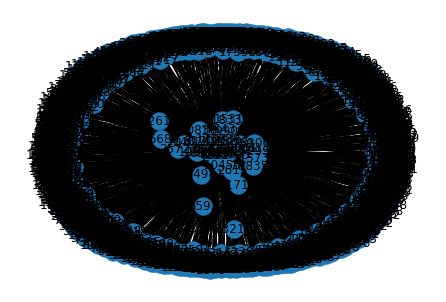

In [ ]:
G_girvan_newman=graph(edge_list_G)

In [ ]:
communities_generator = community.girvan_newman(G_girvan_newman)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
comm=sorted(map(sorted, next_level_communities))

In [ ]:
nx.write_gexf(G_girvan_newman, 'network.gexf')

In [ ]:
nx.info(G_girvan_newman)

'DiGraph with 2025 nodes and 2165 edges'

In [ ]:
nx.clustering(G_girvan_newman)

{614: 0,
 664: 0,
 665: 0,
 666: 0,
 667: 0,
 670: 0,
 671: 0,
 672: 0,
 673: 0,
 674: 0,
 675: 0,
 676: 0,
 677: 0,
 678: 0,
 679: 0,
 680: 0,
 681: 0,
 685: 0,
 686: 0,
 687: 0,
 688: 0,
 689: 0,
 1038: 0,
 378: 0,
 379: 0,
 380: 0,
 382: 0,
 381: 0,
 383: 0,
 384: 0,
 389: 0,
 390: 0,
 391: 0,
 392: 0,
 1437: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 2615: 0,
 262: 0,
 264: 0,
 267: 0,
 268: 0,
 269: 0,
 270: 0,
 271: 0,
 272: 0,
 273: 0,
 3148: 0,
 5238: 0,
 5239: 0,
 5237: 0,
 5240: 0,
 5241: 0,
 5242: 0,
 5243: 0,
 5236: 0,
 5235: 0,
 5234: 0,
 5233: 0,
 5593: 0,
 868: 0,
 867: 0,
 871: 0,
 872: 0,
 873: 0,
 874: 0,
 876: 0,
 877: 0,
 9375: 0,
 65: 0,
 64: 0,
 10336: 0,
 803: 0,
 804: 0,
 805: 0,
 806: 0,
 810: 0,
 811: 0,
 812: 0,
 813: 0,
 815: 0,
 10455: 0,
 251: 0,
 252: 0,
 254: 0,
 255: 0,
 256: 0,
 260: 0,
 259: 0,
 263: 0,
 265: 0,
 266: 0,
 274: 0,
 276: 0,
 275: 0,
 278: 0,
 279: 0,
 281: 0,
 282: 0,
 284: 0,
 283: 0,
 285: 0,
 288: 0,
 289: 0,
 10698: 0,
 220: 0,
 22

In [ ]:
nx.betweenness_centrality(G_girvan_newman)

{614: 0.0,
 664: 0.0,
 665: 0.0,
 666: 0.0,
 667: 0.0,
 670: 0.0,
 671: 0.0,
 672: 0.0,
 673: 0.0,
 674: 0.0,
 675: 0.0,
 676: 0.0,
 677: 0.0,
 678: 0.0,
 679: 0.0,
 680: 0.0,
 681: 0.0,
 685: 0.0,
 686: 0.0,
 687: 0.0,
 688: 0.0,
 689: 0.0,
 1038: 0.0,
 378: 0.0,
 379: 0.0,
 380: 0.0,
 382: 0.0,
 381: 0.0,
 383: 0.0,
 384: 0.0,
 389: 0.0,
 390: 0.0,
 391: 0.0,
 392: 0.0,
 1437: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 2615: 0.0,
 262: 0.0,
 264: 0.0,
 267: 0.0,
 268: 0.0,
 269: 0.0,
 270: 0.0,
 271: 0.0,
 272: 0.0,
 273: 0.0,
 3148: 0.0,
 5238: 0.0,
 5239: 0.0,
 5237: 0.0,
 5240: 0.0,
 5241: 0.0,
 5242: 0.0,
 5243: 0.0,
 5236: 0.0,
 5235: 0.0,
 5234: 0.0,
 5233: 0.0,
 5593: 0.0,
 868: 0.0,
 867: 0.0,
 871: 0.0,
 872: 0.0,
 873: 0.0,
 874: 0.0,
 876: 0.0,
 877: 0.0,
 9375: 0.0,
 65: 0.0,
 64: 0.0,
 10336: 0.0,
 803: 0.0,
 804: 0.0,
 805: 0.0,
 806: 0.0,
 810: 0.0,
 811: 0.0,
 812: 0.0,
 813: 0.0,
 815: 0.0,
 10455: 0.0,
 251: 0.0,
 252: 0.0,
 254: 0.0,
 255: 0.0,
 256: 0

In [ ]:
for node in G_girvan_newman.nodes():
    print(node, nx.degree_centrality(G_girvan_newman)[node])

614 0.010375494071146244
664 0.0004940711462450593
665 0.0004940711462450593
666 0.0004940711462450593
667 0.0004940711462450593
670 0.0004940711462450593
671 0.0004940711462450593
672 0.0004940711462450593
673 0.0004940711462450593
674 0.0004940711462450593
675 0.0004940711462450593
676 0.0004940711462450593
677 0.0004940711462450593
678 0.0004940711462450593
679 0.0004940711462450593
680 0.0004940711462450593
681 0.0004940711462450593
685 0.0004940711462450593
686 0.0004940711462450593
687 0.0004940711462450593
688 0.0009881422924901185
689 0.0009881422924901185
1038 0.005434782608695652
378 0.0004940711462450593
379 0.0004940711462450593
380 0.0004940711462450593
382 0.0004940711462450593
381 0.0004940711462450593
383 0.0004940711462450593
384 0.0004940711462450593
389 0.0004940711462450593
390 0.0004940711462450593
391 0.0004940711462450593
392 0.0004940711462450593
1437 0.002470355731225296
59 0.0004940711462450593
60 0.0004940711462450593
61 0.0009881422924901185
62 0.00098814229

In [ ]:
comm=np.array(comm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
dictionary_girvan_newman=dict()

for i in range(len(comm)):
  dictionary_girvan_newman[f"community {i+1}"]=np.array(comm[i])

In [ ]:
dictionary_girvan_newman

{'community 1': array([      0,     597,     599, ..., 1303381, 1599001, 2077351]),
 'community 10': array([  315,   316,   317,   318,   319,   320, 25723]),
 'community 11': array([ 378,  379,  380,  381,  382,  383,  384,  389,  390,  391,  392,
        1038]),
 'community 12': array([   3148,    3677,    3681,    3682,    3685,    3688,    3689,
           3691,    3694,    3696,    3697,    3728,    3729,    3730,
           3732,    3834,    3895,    3899,    3901,    3921,    3922,
           3971,    3972,    3973,    3974,    3975,    3976,    4054,
           4071,    4074,    4078,    4080,    4083,    4090,    4091,
           4122,    4137,    4148,    4154,    4161,    4303,    4304,
           4316,    4317,    4325,    4326,    4329,    4380,    4407,
           4474,    4478,    4482,    4501,    4502,    4503,    4507,
           4508,    4509,    4510,    4538,    4540,    4543,    4553,
           4572,    4586,    4591,    4593,    4642,    4658,    4659,
         

## 	Featurse Extraction


### 1 - The	longevity	of	the	account

In [ ]:

def longevity(data_frame) :
  df=pd.DataFrame({"LongevityOfAccount": (data_frame["CollectedAt"]-data_frame["CreatedAt"])/np.timedelta64(1, 'D')})
  return df

### 2 - Average Tweet Length

In [ ]:
def avgTweetLength(data_frame) :
  dftemp=pd.DataFrame({"AvgLengthTweets": data_frame["Tweet"].astype(str).apply(len)})
  df = dftemp.groupby(["UserID"]).mean()
  return df

### 3 -  |ReTweets |  /  |Tweets|

In [ ]:
def nbrOfTweets(data_frame) :
  df = pd.DataFrame({"NumberOfTweets": data_frame["NumberOfTweets"] })
  return df

def nbrOfReTweets(data_frame) :
  df = pd.DataFrame({"NumberOfReTweets": data_frame["NumberOfReTweets"] })
  return df
  
def reTweetsFraction(data_frame) :
  dftemp=pd.DataFrame({"ReTweetFraction": (nbrOfReTweets(data_frame) / nbrOfTweets(data_frame)) })
  df = dftemp.groupby(["UserID"]).mean()
  return df


### 4 - |Tweets with URL|  /  |Tweets|

In [ ]:
def existURL(tweet) :
  if(len(re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', str(tweet)))==0):
    return 0;
  else:
    return 1;
  
def URLsPerTweets(data_frame) :
  dftemp=pd.DataFrame({"AvgTweetsWithURL": data_frame["Tweet"].apply(existURL)})
  df = dftemp.groupby(["UserID"]).mean()
  return df


### 5 - Average time between 2 consecutives tweets

In [ ]:
def avgTimeBetween2Tweets(data_frame):
  temp=pd.DataFrame({"CreatedAt":data_frame["CreatedAt"]}).sort_values(by=['UserID','CreatedAt'])
  dftemp=pd.DataFrame({"PreviousTweet":temp.groupby(['UserID']).apply(lambda x:x)['CreatedAt'],
                       "NextTweet":temp.groupby(['UserID']).shift(-1)['CreatedAt']})
  df=pd.DataFrame({"AvgMinutesBetween2Tweets": (dftemp["NextTweet"]-dftemp["PreviousTweet"]) / np.timedelta64(1, 'm')})
  df=df.groupby(["UserID"]).mean()
  return df

### 6 -  Followings / Followers

In [ ]:
def fractionFF(data_frame) :
  df = pd.DataFrame({"RatioFollowings/Followers": (data_frame["NumberOfFollowings"] / data_frame["NumberOfFollowers"]) })
  return df 

## Call feature Function

In [ ]:
dfContent_polluters2 = pd.read_csv('social_honeypot_icwsm_2011/content_polluters.txt',sep='\t', names=
                 ["UserID","CreatedAt","CollectedAt","NumberOfFollowings","NumberOfFollowers",
                  "NumberOfTweets","LengthOfScreenName","LengthOfDescriptionInUserProfile"],
                parse_dates=["CreatedAt","CollectedAt"],index_col=0)

dfLegitimate_users2 = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users.txt',sep='\t', names=
                 ["UserID","CreatedAt","CollectedAt","NumberOfFollowings","NumberOfFollowers",
                  "NumberOfTweets","LengthOfScreenName","LengthOfDescriptionInUserProfile"],
                parse_dates=["CreatedAt","CollectedAt"],index_col=0)

In [ ]:
first_features_polluters=pd.concat([longevity(dfContent_polluters2),
                                    fractionFF(dfContent_polluters2),
                                    # reTweetsFraction(dfContent_polluters2),
                                    avgTweetLength(dfContent_polluters_tweets),
                                    URLsPerTweets(dfContent_polluters_tweets),
                                    avgTimeBetween2Tweets(dfContent_polluters_tweets)],axis=1)

first_features_legitimate=pd.concat([longevity(dfLegitimate_users2),
                                    fractionFF(dfLegitimate_users2),
                                    # reTweetsFraction(dfLegitimate_users2),
                                    avgTweetLength(dfLegitimate_users_tweets),
                                    URLsPerTweets(dfLegitimate_users_tweets),
                                    avgTimeBetween2Tweets(dfLegitimate_users_tweets)],axis=1)

## Label Honey Pot dataSet

In [ ]:
data_set_polluters = first_features_polluters
data_set_legitimate = first_features_legitimate

In [ ]:
data_set_polluters.insert(0,"Class",1)
data_set_legitimate.insert(0,"Class",0)

## Clean Data

In [ ]:
def attributesOfUniqueValues(data_set_users) :
  list=[]
  for col in data_set_users.columns:
    if (data_set_users[col]==data_set_users[col].iloc[0]).all == True:
      list.append(col)
  return data_set_users.drop(list)

In [ ]:
def duplicateRows(data_set_users):
  return data_set_users.drop_duplicates()

In [ ]:
def missingValues(data_set_users):
  valuesReplaced = data_set_users.replace([np.inf,-np.inf],np.nan)
  valuesReplaced.fillna(0,inplace=True)
  return valuesReplaced

In [ ]:
def shiftCol(data_set_users):
  df=data_set_users.drop(["Class"],axis=1)
  # df=df.apply(zscore)
  df["Class"]=data_set_users["Class"]
  return df

In [ ]:
data_set_polluters=attributesOfUniqueValues(data_set_polluters)
data_set_polluters=duplicateRows(data_set_polluters)
data_set_polluters=missingValues(data_set_polluters)
data_set_polluters=shiftCol(data_set_polluters)

In [ ]:
data_set_legitimate=attributesOfUniqueValues(data_set_legitimate)
data_set_legitimate=duplicateRows(data_set_legitimate)
data_set_legitimate=missingValues(data_set_legitimate)
data_set_legitimate=shiftCol(data_set_legitimate)

In [ ]:
data_set=pd.concat([data_set_polluters,data_set_legitimate])

## algorithm 2

In [ ]:
def neighborhood(G, node, n):
    path_lengths = nx.single_source_dijkstra_path_length(G, node)
    return [node for node, length in path_lengths.items()
                    if length == n]

In [ ]:
print(neighborhood(G,10836,2))

[10997, 783705, 964981, 10316, 10327, 10325, 10340, 10342, 10354, 10362, 10363, 10370, 10373, 10397, 10406, 10409, 10422, 10433, 10438, 10441, 10447, 10446, 10460, 10457, 10469, 10471, 10484, 10495, 10509, 10508, 10520, 10521, 10535, 10545, 10558, 10570, 10576, 10593, 10604, 10605, 10615, 10623, 10626, 10627, 10656, 10655, 10660, 10671, 10669, 10673, 10672, 10682, 10697, 10698, 10699, 10718, 10731, 10746, 10745, 10755, 10761, 10762, 10764, 10786, 10788, 10785, 10784, 10804, 10814, 10834, 10837, 10835, 10840, 10851, 10875, 10874, 10887, 10899, 10898, 10910, 10925, 10920, 10921, 10933, 10939, 10952, 10951, 10958, 10950, 10965]


In [ ]:
def find_max_clique(node) :
    dict_of_cliques=nx.cliques_containing_node(G,nodes=node)
    # print(dict_of_cliques)
    max_clique = max([i for i in dict_of_cliques])
    # print(max_clique)
    return max_clique

In [ ]:
spam_account = []

for H in final_without_duplicates :
    suspect_set = []
    for node_v in H : 
        if node_v in Base_Spammer["UserID"].values:
            try :
                S = find_max_clique(node_v)
                suspect_set.extend(S)
            except Exception:
                pass
            spam_account.extend(suspect_set)
            print(node_v)
            print(len(neighborhood(G,node_v,2)))


817045
1
1322691
1
10836
90
10997
10
783705
5
815299
4
6301
5
10997
10
633293
4
815299
4
1091571
4
1303381
4
6301
5
10836
90
10997
10
783705
5
1599001
1
2077351
4
10997
10
788352
5
2077351
4
810011
0
1091571
4
1467621
3
1907361
1
6301
5
633293
4
815299
4
1091571
4
1303381
4
1467621
3
6301
5
633293
4
1091571
4
1303381
4
6301
5
633293
4
783705
5
1303381
4
1467621
3
1907361
1
10836
90
783705
5
717883
0
788352
5
2077351
4
10997
10
1599001
1
6301
5
783705
5
815299
4
1091571
4
788352
5
10836
90
783705
5
964981
3
763068
2
1467621
3
788352
5
2077351
4
763068
2


In [ ]:
spam_account = set(spam_account)

In [ ]:
spam_account

{120,
 1351,
 1354,
 1593,
 1904,
 2497,
 3567,
 3578,
 3712,
 3922,
 3936,
 4091,
 5136,
 5736,
 6301,
 7917,
 10836,
 10997,
 12199,
 13380,
 17054,
 633293,
 717883,
 763068,
 783705,
 788352,
 810011,
 815299,
 817045,
 964981,
 1091571,
 1303381,
 1322691,
 1467621,
 1599001,
 1907361,
 2077351,
 2157321}